# Diabetes Disease Prediction

# Diabetes
Diabetes is a common condition that affects people of all ages. There are several forms of diabetes. Type 2 is the most common. A combination of treatment strategies can help you manage the condition to live a healthy life and prevent complications.

# What is diabetes?
Diabetes is a condition that happens when your blood sugar (glucose) is too high. It develops when your pancreas doesn’t make enough insulin or any at all, or when your body isn’t responding to the effects of insulin properly. Diabetes affects people of all ages. Most forms of diabetes are chronic (lifelong), and all forms are manageable with medications and/or lifestyle changes

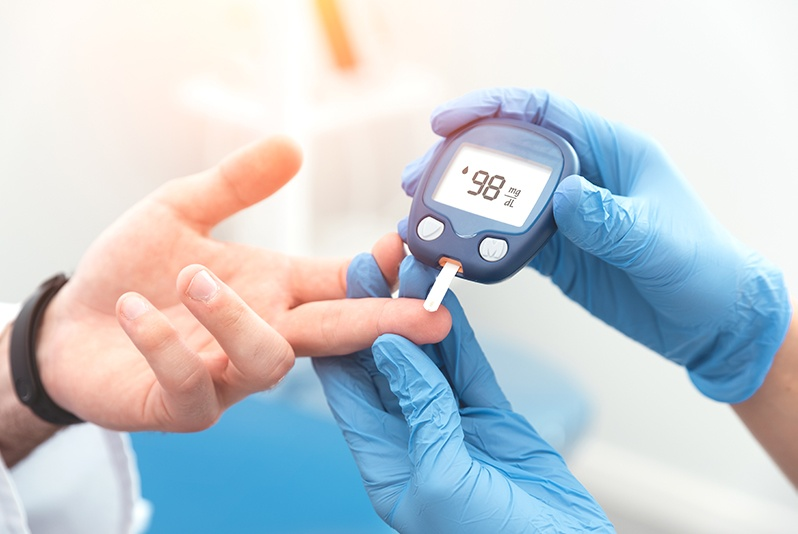
# prediction
Machine learning algorithms can be used to predict diabetes by analyzing a person's medical history, risk factors, and genetic makeup. These algorithms can also analyze medical images to detect early signs of diabetes.
How it works
Machine learning algorithms analyze large amounts of data to identify patterns and make predictions.
The algorithms can use supervised learning to classify data as having diabetes or not.
The algorithms can also use unsupervised learning to cluster data and identify patterns.
The algorithms can use ensemble learning to combine multiple models to improve accuracy.

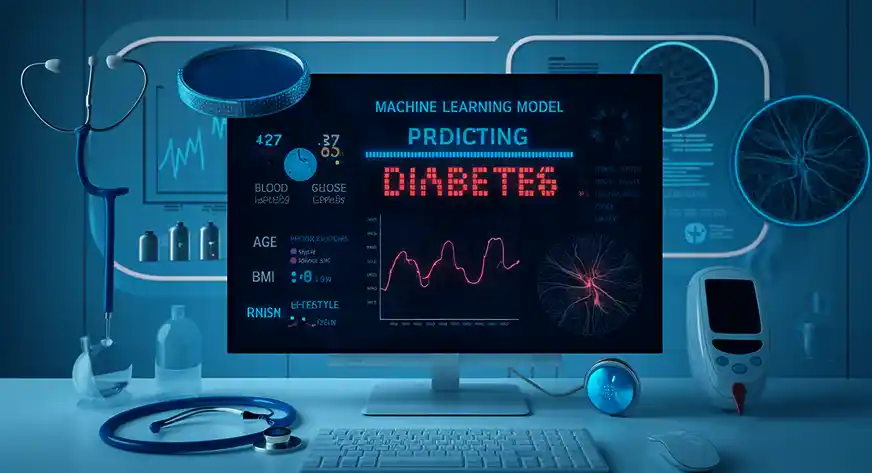

# Import Dataset Using PANDA

In [ ]:
import pandas as pd

# File path
file_path = 'dataset diabetes/diabetes.csv'

# Load the dataset
try:
    # Specify the first row as headers
    data = pd.read_csv(file_path, header=0)  # First row is used as column names
    print("Dataset loaded successfully!")
    print(data)
except FileNotFoundError:
    print(f"Error: The file at '{file_path}' was not found. Please check the path.")
except Exception as e:
    print(f"An error occurred: {e}")


Dataset loaded successfully!
       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6

# Set Names

In [ ]:
import pandas as pd

# File path
file_path = 'dataset diabetes/diabetes.csv'

# Define column names
column_names = [
    'Gender', 'Age', 'Hypertension', 'Heart_Disease',
    'Smoking_History', 'BMI', 'HbA1c_Level',
    'Blood_Glucose_Level', 'Diabetes'
]

# Load the dataset and assign column names
try:
    data = pd.read_csv(file_path, header=0, names=column_names)  # Set custom column names
    print("Dataset loaded successfully with column names!")
    print(data)
except FileNotFoundError:
    print(f"Error: The file at '{file_path}' was not found. Please check the path.")
except Exception as e:
    print(f"An error occurred: {e}")


Dataset loaded successfully with column names!
       Gender   Age  Hypertension  Heart_Disease Smoking_History    BMI  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_Level  Blood_Glucose_Level  Diabetes  


#  Data Preprocessing

# Handle Missing Values

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd

# File path and column names
file_path = 'dataset diabetes/diabetes.csv'
column_names = [
    'Gender', 'Age', 'Hypertension', 'Heart_Disease',
    'Smoking_History', 'BMI', 'HbA1c_Level',
    'Blood_Glucose_Level', 'Diabetes'
]

# Load dataset
data = pd.read_csv(file_path, header=0, names=column_names, low_memory=False)

# Check for missing values
print("Missing Values Before Handling:")
print(data.isnull().sum())

# Impute numerical columns with the median
num_imputer = SimpleImputer(strategy='median')
numerical_columns = ['Age', 'BMI', 'HbA1c_Level', 'Blood_Glucose_Level']
data[numerical_columns] = num_imputer.fit_transform(data[numerical_columns])

# Impute categorical columns with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_columns = ['Gender', 'Smoking_History']
data[categorical_columns] = cat_imputer.fit_transform(data[categorical_columns])

# Check for missing values after handling
print("Missing Values After Handling:")
print(data.isnull().sum())


Missing Values Before Handling:
Gender                 0
Age                    0
Hypertension           0
Heart_Disease          0
Smoking_History        0
BMI                    0
HbA1c_Level            0
Blood_Glucose_Level    0
Diabetes               0
dtype: int64
Missing Values After Handling:
Gender                 0
Age                    0
Hypertension           0
Heart_Disease          0
Smoking_History        0
BMI                    0
HbA1c_Level            0
Blood_Glucose_Level    0
Diabetes               0
dtype: int64


# Normalize Numerical Features

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale numerical columns
numerical_columns = ['Age', 'BMI', 'HbA1c_Level', 'Blood_Glucose_Level']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display a sample of the normalized data
print("Normalized Data Sample:")
print(data[numerical_columns].head())


Normalized Data Sample:
        Age       BMI  HbA1c_Level  Blood_Glucose_Level
0  1.692704 -0.321056     1.001706             0.047704
1  0.538006 -0.000116     1.001706            -1.426210
2 -0.616691 -0.000116     0.161108             0.489878
3 -0.261399 -0.583232    -0.492690             0.416183
4  1.515058 -1.081970    -0.679490             0.416183


# Encode Categorical Features

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Encode categorical columns
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Smoking_History'] = label_encoder.fit_transform(data['Smoking_History'])

# Display a sample of the encoded data
print("Encoded Data Sample:")
print(data[['Gender', 'Smoking_History']].head())


Encoded Data Sample:
   Gender  Smoking_History
0       0                4
1       0                0
2       1                4
3       0                1
4       1                1


# Exploratory Data Analysis (EDA):

# Feature Distributions - Histograms

<Figure size 1200x1000 with 0 Axes>

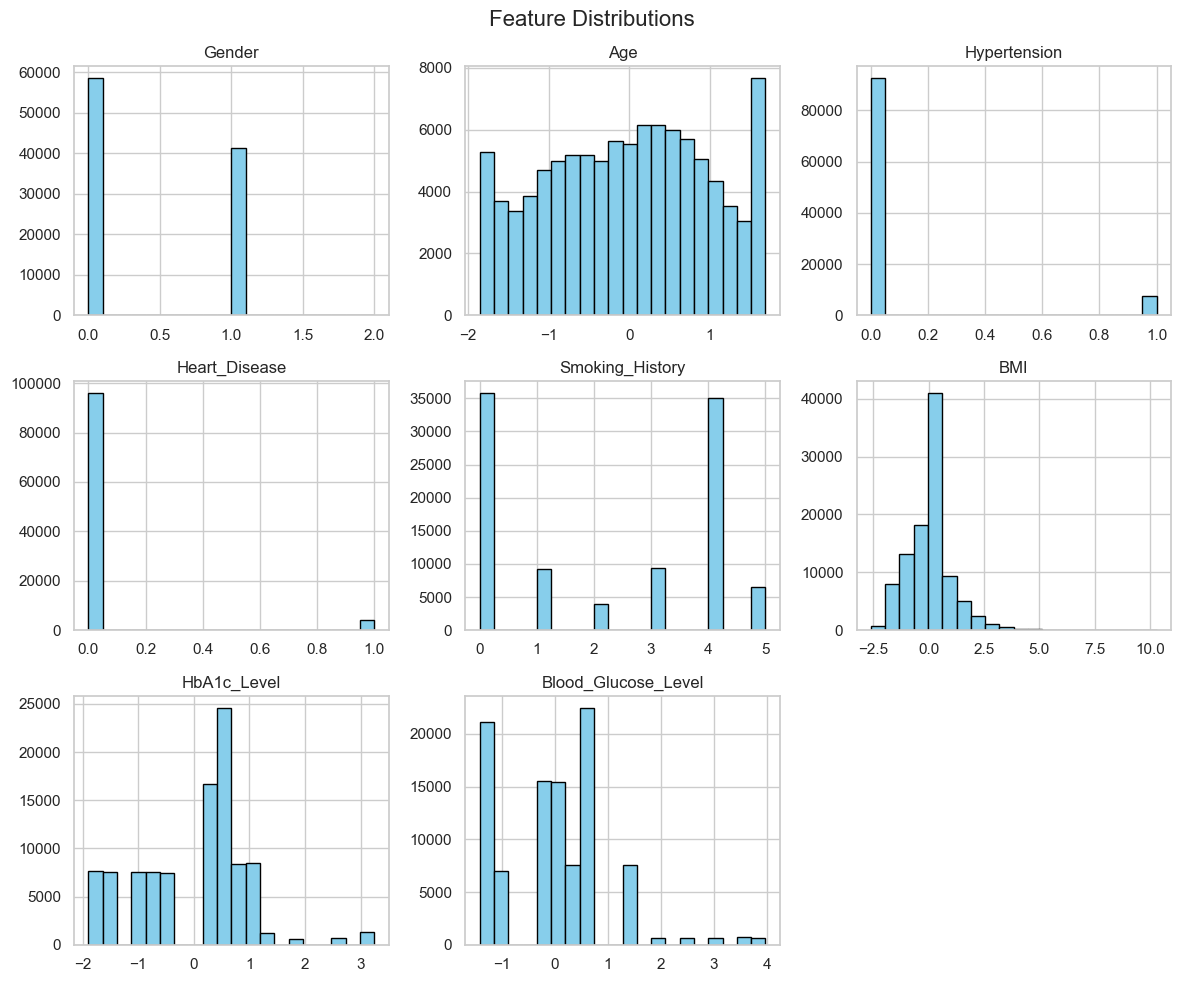

In [ ]:
import matplotlib.pyplot as plt

# Set up the plot style
sns=sns.set(style="whitegrid")

# Plot feature distributions for numerical columns
plt.figure(figsize=(12, 10))
data.drop(columns='Diabetes').hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()


# Correlation Heatmap

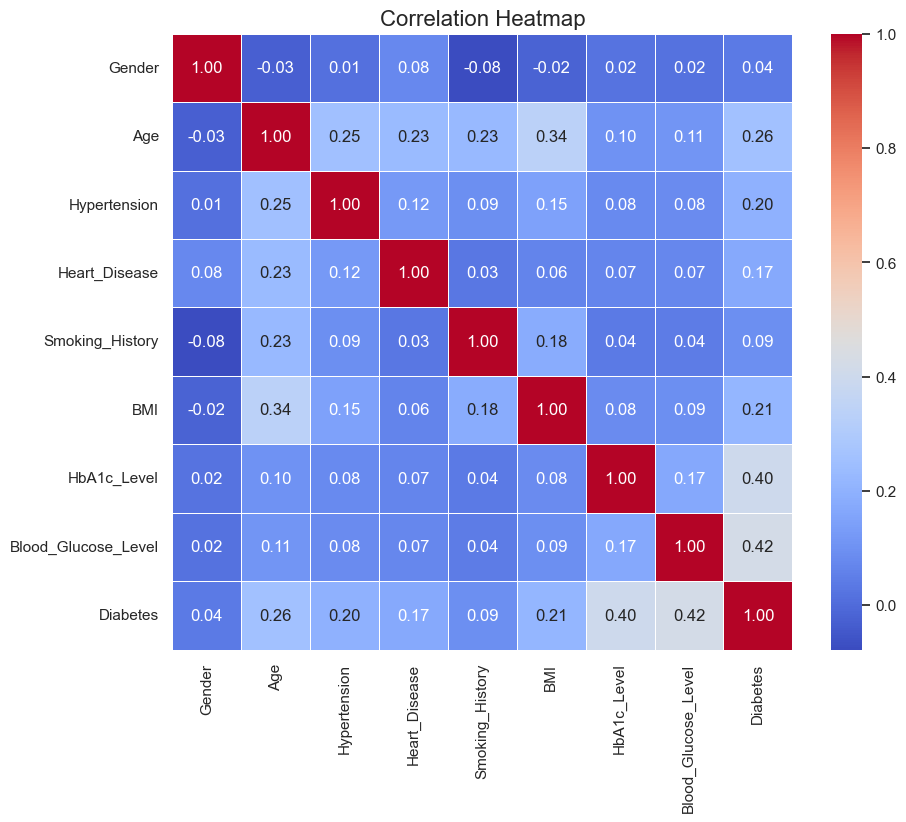

In [ ]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


# Scatter Plot - Age vs Blood Glucose Level

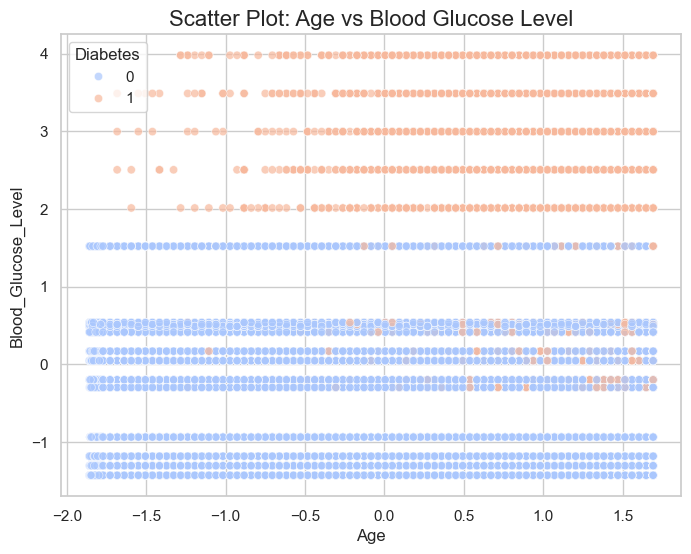

In [ ]:
# Scatter plot: Age vs Blood Glucose Level
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Blood_Glucose_Level', hue='Diabetes', data=data, palette='coolwarm', alpha=0.7)
plt.title('Scatter Plot: Age vs Blood Glucose Level', fontsize=16)
plt.show()


# Scatter Plot - BMI vs HbA1c Level

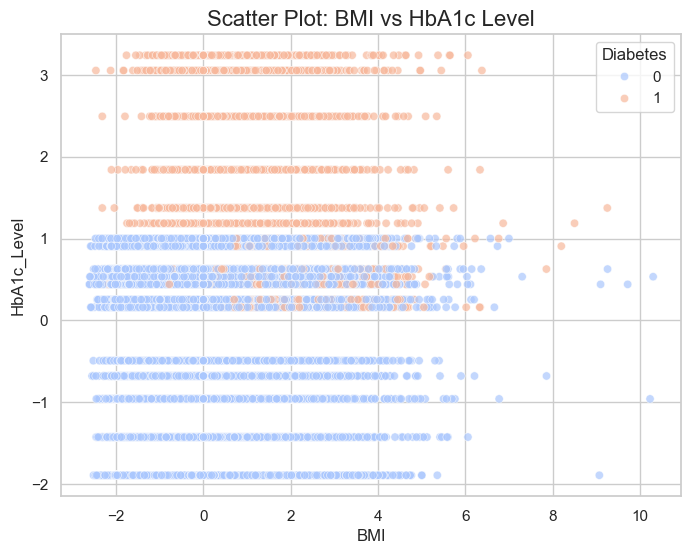

In [ ]:
# Scatter plot: BMI vs HbA1c Level
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='HbA1c_Level', hue='Diabetes', data=data, palette='coolwarm', alpha=0.7)
plt.title('Scatter Plot: BMI vs HbA1c Level', fontsize=16)
plt.show()


# Train Models

# Train Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features (X) and target (y)
X = data.drop(columns='Diabetes')  # Features
y = data['Diabetes']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the Logistic Regression model
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the Logistic Regression model
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



# Train Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Train the Random Forest model
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



# Train Support Vector Machine (SVM) Model

In [ ]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine model
svm = SVC(random_state=42)

# Train the SVM model
svm.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = svm.predict(X_test_scaled)

# Evaluate the SVM model
print("SVM - Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.98      0.57      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.97      0.79      0.85     20000
weighted avg       0.96      0.96      0.96     20000



# Evaluation of Models

# Evaluate Logistic Regression Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the Logistic Regression model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

# Print evaluation metrics for Logistic Regression
print("Logistic Regression - Evaluation Metrics:")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1-Score: {f1_log_reg:.4f}")


Logistic Regression - Evaluation Metrics:
Accuracy: 0.9587
Precision: 0.8637
Recall: 0.6124
F1-Score: 0.7167


# Evaluate Random Forest Model

In [ ]:
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print evaluation metrics for Random Forest
print("\nRandom Forest - Evaluation Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")



Random Forest - Evaluation Metrics:
Accuracy: 0.9707
Precision: 0.9517
Recall: 0.6915
F1-Score: 0.8009


# Evaluate SVM Model

In [ ]:
# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Print evaluation metrics for SVM
print("\nSVM - Evaluation Metrics:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")



SVM - Evaluation Metrics:
Accuracy: 0.9624
Precision: 0.9761
Recall: 0.5732
F1-Score: 0.7222


# Compare Models' Performance

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from IPython.display import display, HTML

# Create a dictionary to store the results for each model
model_comparison = {
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Accuracy": [accuracy_log_reg, accuracy_rf, accuracy_svm],
    "Precision": [precision_log_reg, precision_rf, precision_svm],
    "Recall": [recall_log_reg, recall_rf, recall_svm],
    "F1-Score": [f1_log_reg, f1_rf, f1_svm]
}

# Convert the dictionary into a DataFrame for easy comparison
comparison_df = pd.DataFrame(model_comparison)

# Display the comparison table
display(HTML("<h2>Model Performance Comparison:</h2>"))
display(HTML(comparison_df.to_html(index=False)))

# Identify the best model based on accuracy
best_accuracy_model = comparison_df.loc[comparison_df['Accuracy'].idxmax()]
display(HTML(f"<h3>Best Model Based on Accuracy:</h3><pre>{best_accuracy_model}</pre>"))

# Identify the best model based on precision
best_precision_model = comparison_df.loc[comparison_df['Precision'].idxmax()]
display(HTML(f"<h3>Best Model Based on Precision:</h3><pre>{best_precision_model}</pre>"))

# Identify the best model based on recall
best_recall_model = comparison_df.loc[comparison_df['Recall'].idxmax()]
display(HTML(f"<h3>Best Model Based on Recall:</h3><pre>{best_recall_model}</pre>"))

# Identify the best model based on F1-Score
best_f1_model = comparison_df.loc[comparison_df['F1-Score'].idxmax()]
display(HTML(f"<h3>Best Model Based on F1-Score:</h3><pre>{best_f1_model}</pre>"))


Model,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.95865,0.863749,0.612412,0.716684
Random Forest,0.97065,0.951652,0.691452,0.800949
SVM,0.96235,0.976072,0.573185,0.722243


# Model Performance Comparison with pie char and bar graph

Model,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.95865,0.863749,0.612412,0.716684
Random Forest,0.97065,0.951652,0.691452,0.800949
SVM,0.96235,0.976072,0.573185,0.722243


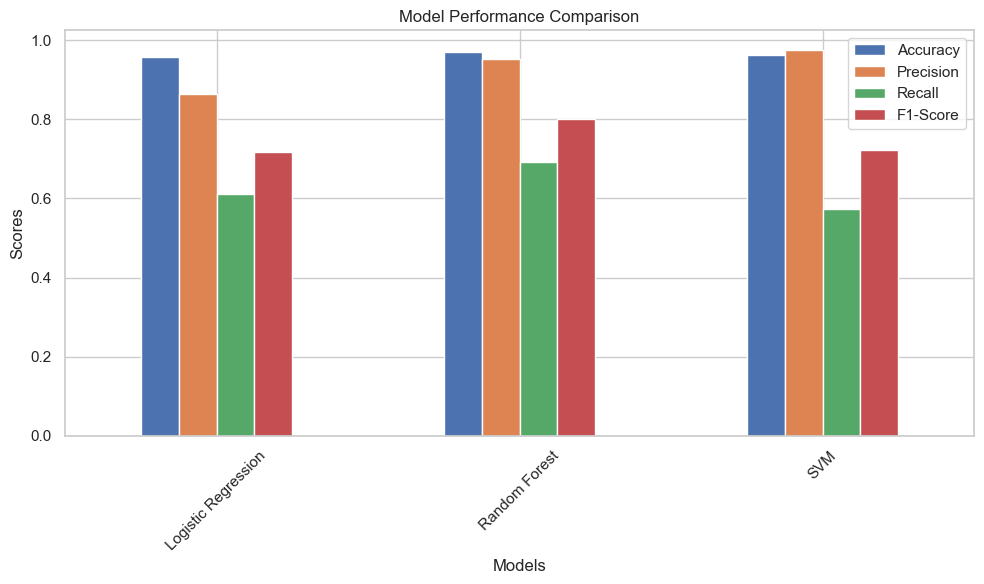

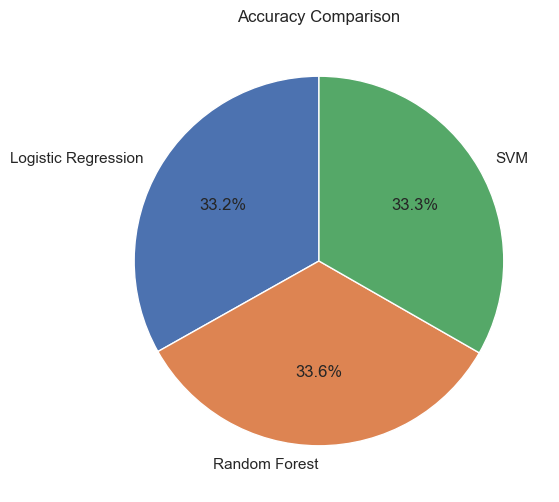

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from IPython.display import display, HTML

# Create a dictionary to store the results for each model
model_comparison = {
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Accuracy": [accuracy_log_reg, accuracy_rf, accuracy_svm],
    "Precision": [precision_log_reg, precision_rf, precision_svm],
    "Recall": [recall_log_reg, recall_rf, recall_svm],
    "F1-Score": [f1_log_reg, f1_rf, f1_svm]
}

# Convert the dictionary into a DataFrame for easy comparison
comparison_df = pd.DataFrame(model_comparison)

# Display the comparison table
display(HTML("<h2>Model Performance Comparison:</h2>"))
display(HTML(comparison_df.to_html(index=False)))

# Plotting Bar Chart for Performance Metrics
fig, ax = plt.subplots(figsize=(10, 6))
comparison_df.set_index('Model').plot(kind='bar', ax=ax)
plt.title("Model Performance Comparison")
plt.ylabel("Scores")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.tight_layout()

# Display the bar chart
plt.show()

# Plotting Pie Chart for Accuracy Comparison
accuracy_data = comparison_df[["Model", "Accuracy"]].set_index("Model")
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(accuracy_data["Accuracy"], labels=accuracy_data.index, autopct='%1.1f%%', startangle=90)
plt.title("Accuracy Comparison")
plt.show()




# Announce the best model

In [ ]:
from IPython.display import display, HTML
import pandas as pd

# Assuming 'comparison_df' has the results from the three models
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy': [accuracy_log_reg, accuracy_rf, accuracy_svm],
    'Precision': [precision_log_reg, precision_rf, precision_svm],
    'Recall': [recall_log_reg, recall_rf, recall_svm],
    'F1-Score': [f1_log_reg, f1_rf, f1_svm]
})

# Function to colorize output based on metrics
def colorize_metrics(value, metric_type):
    if metric_type == 'accuracy':
        return f"<span style='color:white;'>{value:.2f}%</span>" if value >= 70 else f"<span style='color:black;'>{value:.2f}%</span>"
    elif metric_type == 'precision':
        return f"<span style='color:black;'>{value:.2f}</span>"
    elif metric_type == 'recall':
        return f"<span style='color:white;'>{value:.2f}</span>"
    elif metric_type == 'f1':
        return f"<span style='color:black;'>{value:.2f}</span>"
    return value

# Identifying the best models based on each metric
best_accuracy = comparison_df.loc[comparison_df['Accuracy'].idxmax()]
best_precision = comparison_df.loc[comparison_df['Precision'].idxmax()]
best_recall = comparison_df.loc[comparison_df['Recall'].idxmax()]
best_f1 = comparison_df.loc[comparison_df['F1-Score'].idxmax()]

# HTML output
html_output = f"""
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Best Model Evaluation</title>
  <style>
    body {{
      font-family: Arial, sans-serif;
      background-color: #2e2e2e;
      color: #fff;
      display: flex;
      justify-content: center;
      align-items: center;
      height: 100vh;
    }}
    .container {{
      text-align: center;
      background-color: #3a3a3a;
      padding: 30px;
      border-radius: 10px;
      box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
      width: 60%;
    }}
    h1 {{
      font-size: 2.5em;
      color: #f1f1f1;
    }}
    table {{
      width: 100%;
      margin-top: 20px;
      border-collapse: collapse;
    }}
    th, td {{
      padding: 10px;
      border: 1px solid #ddd;
    }}
    th {{
      background-color: #4a4a4a;
      color: #fff;
    }}
    td {{
      background-color: #5a5a5a;
      color: #fff;
    }}
  </style>
</head>
<body>
  <div class="container">
    <h1>Best Model Based on Accuracy</h1>
    <table>
      <tr>
        <th>Model</th>
        <th>Accuracy (%)</th>
      </tr>
      <tr>
        <td>{best_accuracy['Model']}</td>
        <td>{colorize_metrics(best_accuracy['Accuracy'], 'accuracy')}</td>
      </tr>
    </table>

    <h1>Best Model Based on Precision</h1>
    <table>
      <tr>
        <th>Model</th>
        <th>Precision</th>
      </tr>
      <tr>
        <td>{best_precision['Model']}</td>
        <td>{colorize_metrics(best_precision['Precision'], 'precision')}</td>
      </tr>
    </table>

    <h1>Best Model Based on Recall</h1>
    <table>
      <tr>
        <th>Model</th>
        <th>Recall</th>
      </tr>
      <tr>
        <td>{best_recall['Model']}</td>
        <td>{colorize_metrics(best_recall['Recall'], 'recall')}</td>
      </tr>
    </table>

    <h1>Best Model Based on F1-Score</h1>
    <table>
      <tr>
        <th>Model</th>
        <th>F1-Score</th>
      </tr>
      <tr>
        <td>{best_f1['Model']}</td>
        <td>{colorize_metrics(best_f1['F1-Score'], 'f1')}</td>
      </tr>
    </table>
  </div>
</body>
</html>
"""

# Display HTML output
display(HTML(html_output))


Model,Accuracy (%)
Random Forest,0.97%
Model,Precision
SVM,0.98
Model,Recall
Random Forest,0.69
Model,F1-Score
Random Forest,0.80


# Test the patient with best model

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('dataset diabetes/diabetes.csv')  # Replace with the actual path if needed

# Preprocessing: Handle categorical variables (gender, smoking_history)
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})  # Female = 0, Male = 1
df['smoking_history'] = df['smoking_history'].map({'never': 0, 'current': 1, 'former': 2, 'No Info': 3})

# Fill missing values (if any)
df.fillna(df.mean(), inplace=True)  # For numerical columns, you can use mean or median

# Define features (X) and target (y)
X = df[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = df['diabetes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Test Patient Data (replace with actual data for testing)
patient_data = pd.DataFrame([[1, 45, 0, 0, 0, 28.5, 5.8, 120]], columns=['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level'])

# Standardize the patient data (using the same scaler)
patient_data_scaled = scaler.transform(patient_data)

# Make prediction for the patient
patient_prediction = svm_model.predict(patient_data_scaled)

# Create HTML result
html_output = f"""
<html>
<head>
    <style>
        body {{
            font-family: Arial, sans-serif;
            background-color: #f4f4f9;
            color: #333;
            padding: 20px;
        }}
        h2 {{
            color: #5c6bc0;
        }}
        .result {{
            background-color: #4CAF50;
            color: white;
            padding: 15px;
            border-radius: 5px;
            margin-top: 20px;
            font-size: 18px;
        }}
        .result-negative {{
            background-color: #f44336;
        }}
        .info {{
            margin-top: 20px;
            font-size: 16px;
        }}
    </style>
</head>
<body>
    <h2>Patient Diabetes Prediction</h2>
    <p><strong>Model Accuracy:</strong> {accuracy * 100:.2f}%</p>
    <div class="info">
        <h3>Test Patient Data:</h3>
        <ul>
            <li><strong>Gender:</strong> {'Male' if patient_data['gender'][0] == 1 else 'Female'}</li>
            <li><strong>Age:</strong> {patient_data['age'][0]}</li>
            <li><strong>Hypertension:</strong> {patient_data['hypertension'][0]}</li>
            <li><strong>Heart Disease:</strong> {patient_data['heart_disease'][0]}</li>
            <li><strong>Smoking History:</strong> {['Never', 'Current', 'Former', 'No Info'][patient_data['smoking_history'][0]]}</li>
            <li><strong>BMI:</strong> {patient_data['bmi'][0]}</li>
            <li><strong>HbA1c Level:</strong> {patient_data['HbA1c_level'][0]}</li>
            <li><strong>Blood Glucose Level:</strong> {patient_data['blood_glucose_level'][0]}</li>
        </ul>
    </div>
    <div class="result{'-negative' if patient_prediction[0] == 1 else ''}">
        <strong>Diabetes Prediction:</strong> {'Positive' if patient_prediction[0] == 1 else 'Negative'}
    </div>
</body>
</html>
"""

# Save the HTML output to a file
with open("patient_prediction_result.html", "w") as file:
    file.write(html_output)

print("Prediction result has been saved as 'patient_prediction_result.html'.")

from IPython.display import display, HTML


# Render the HTML directly in the notebook
display(HTML(html_output))



Model Accuracy: 96.27%
Prediction result has been saved as 'patient_prediction_result.html'.


# Thank You